## Assignment

#### Today, we discussed on three panels of beta coefficients of three methods, stepwise, Lasso and Ridge. Describe the three panels. Also write the formula for three methods and add description on them.

In [1]:
%load_ext rpy2.ipython

In [5]:
%%R

library(lars)
data(diabetes)
par(mfrow=c(1,2))
attach(diabetes)
object.step <- lars(x,y,type="stepwise")
object.lasso <- lars(x,y,type="lasso")

library(ridge)
lambda <-seq(from=1,to=0,length=100)
lambda <- seq(from=100,to=0,length=10000)
object.ridge <- linearRidge(y ~ x,lambda=lambda)

detach(diabetes)

/Users/takayan/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  以下のオブジェクトは diabetes (pos = 4) からマスクされています: 

     x, x2, y 


  warnings.warn(x, RRuntimeWarning)


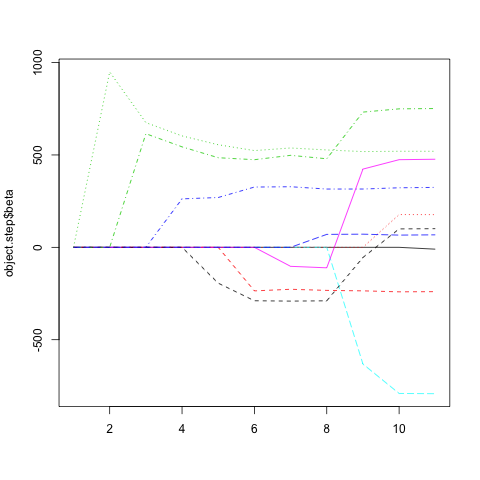

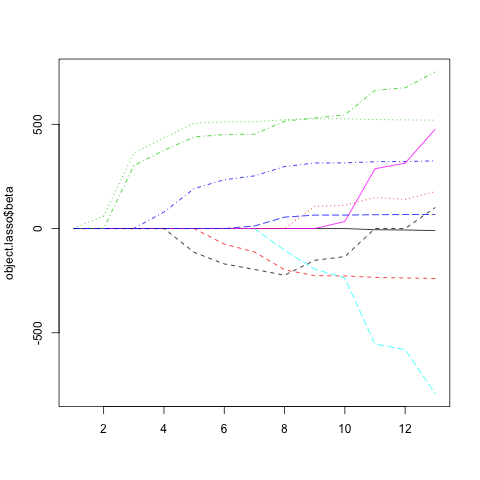

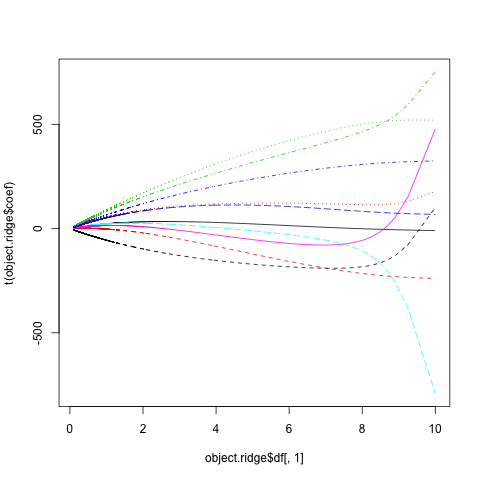

In [8]:
%%R

par(mfcol=c(1,1))
matplot(object.step$beta,type="l")
matplot(object.lasso$beta,type="l")
matplot(object.ridge$df[,1],t(object.ridge$coef),type="l")

### Stepwise

ある変数$y$が$n$個の変数$x_1,x_2,...,x_n$で下記の回帰式で説明されると仮定する。
$$
y=\sum_{i=1}^n{\beta_ix_i}
$$
今、$N$個のサンプルデータがあるとき、$y_i$を変数$x$から推定したいが、どの変数が$y$をうまく説明できるかはわからない。そのような場合の変数選択の方法として用いられる方法の1つがstepwise regressionである。  
Stepwise regressionではまず、全ての$i=1,2,...,n$について1変数のみでの回帰式$y=\beta_i x_i$について$(y-\hat{y} )^2=(y-\hat{\beta_i}x_i)^2$となる$\beta_i$を求め、それぞれの$\beta_i$についてモデル判断を行うための統計量を計算し、最も適合する$\beta_i$を決定する。統計量はt値やF値、Mallows's Cpや赤池情報量基準(AIC)、ベイズ情報量基準(BIC)などが用いられる。  
仮に、1変数でのモデルが$y=\beta_1x_i$で最も適合したとすると、次に$x_1$を固定して2変数での回帰式$y=\beta_1x_1+\beta_ix_i(i \neq 1)$について$\hat{\beta}=\underset{\beta}{\text{argmin}} (y-(\beta_1x_1+\beta_ix_i))^2$を求め、同じく統計量を計算して、最も適合する$\beta_1,\beta_i$を決定する。これを繰り返し、変数を増やして回帰式を決定していくが、モデル判断の統計量が初めに設定した基準を下回った場合(t値やF値は設定したp値を上回る場合、AICやBICは基準値が改善しなかった場合）、そこで変数選択を終了して前の回帰式を最終の回帰式とする。

### LASSO

ある変数$y$が$n$個の変数$x_1,x_2,...,x_n$で下記の回帰式で説明されると仮定する。
$$
y=\sum_{i=1}^n{\beta_ix_i}
$$
このとき、2乗誤差関数$S(\beta)$は、
$$
S(\beta)=(y-\sum_{i=1}^n{\beta_ix_i})^2
$$
となり、この最小化問題を解くことで$\hat{\beta}$を求めることができる。しかし、変数が多くなるとこのモデルでのfittingは過学習に陥りやすく汎化性能が低下する。そこで、2乗誤差関数に$L_1$正則化項を加え、汎化性能を高めた方法をLASSOという。  
LASSOでは、誤差関数として
$$
S(\beta)_{LASSO}=(y-\sum_{i=1}^n{\beta_ix_i})^2+\lambda \sum_{i=1}^n{||\beta_i||_1}
$$
を用い、
$$
\beta_{LASSO}=\underset{\beta}{\text{argmin}}\ S(\beta)_{LASSO}
$$
を求めることにより$\beta$を推定する。これは、$S(\beta)$の最小化問題に、$\sum_{i=1}^n{||\beta_i||_1} \leq \lambda$という制約を加えていることになる。これは、2次元においては菱形の範囲での制約を課すことになり、誤差関数との境界は$\beta_i=0$となりやすくなるため、変数が削減される。

### Ridge回帰

LASSOでの正則化項を$L_2$正則化項に変えたものがRidge回帰である。つまり、誤差関数
$$
S(\beta)_{Ridge}=(y-\sum_{i=1}^n{\beta_ix_i})^2+\lambda \sum_{i=1}^n{||\beta_i||_2^2}
$$
を用い、
$$
\beta_{Ridge}=\underset{\beta}{\text{argmin}}\ S(\beta)_{Ridge}
$$
を求めることで$\beta$を推定する。LASSOと比較して、制約が$\sum_{i=1}^n{||\beta_i||_2^2} \leq \lambda$となる。つまり半径$\lambda$の円、球、超球面での制約を設けているため$\beta$が削減されない。